In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
%matplotlib inline

Dataset Overview:https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews/home  
This dataset includes 23486 rows and 10 feature variables. Each row corresponds to a customer review, and includes the variables:

Clothing ID: Integer Categorical variable that refers to the specific piece being reviewed.  
Age: Positive Integer variable of the reviewers age.  
Title: String variable for the title of the review.  
Review Text: String variable for the review body.  
Rating: Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.  
Recommended IND: Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not   recommended.  
Positive Feedback Count: Positive Integer documenting the number of other customers who found this review positive.  
Division Name: Categorical name of the product high level division.  
Department Name: Categorical name of the product department name.  
Class Name: Categorical name of the product class name.  

In [2]:
df=pd.read_csv('Womens Clothing E-Commerce Reviews.csv')   
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [3]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
Unnamed: 0                 23486 non-null int64
Clothing ID                23486 non-null int64
Age                        23486 non-null int64
Title                      19676 non-null object
Review Text                22641 non-null object
Rating                     23486 non-null int64
Recommended IND            23486 non-null int64
Positive Feedback Count    23486 non-null int64
Division Name              23472 non-null object
Department Name            23472 non-null object
Class Name                 23472 non-null object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [4]:
df.dropna(axis=0,inplace=True)
df.drop(['Unnamed: 0'],1,inplace=True)
print(df.isnull().sum())
df.shape

Clothing ID                0
Age                        0
Title                      0
Review Text                0
Rating                     0
Recommended IND            0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
dtype: int64


(19662, 10)

In [5]:
print((df['Division Name'].value_counts()/(df['Division Name'].value_counts().sum()))*100)
print((df['Department Name'].value_counts()/(df['Department Name'].value_counts().sum()))*100)
print((df['Class Name'].value_counts()/(df['Class Name'].value_counts().sum()))*100)

General           59.322551
General Petite    34.472587
Initmates          6.204862
Name: Division Name, dtype: float64
Tops        44.313905
Dresses     27.316651
Bottoms     16.193673
Intimate     7.161021
Jackets      4.470552
Trend        0.544197
Name: Department Name, dtype: float64
Dresses           27.316651
Knits             20.247177
Blouses           13.157359
Sweaters           6.194690
Pants              5.884447
Jeans              4.933374
Fine gauge         4.714678
Skirts             4.048418
Jackets            3.041400
Lounge             2.919337
Swim               1.490184
Outerwear          1.429153
Shorts             1.322348
Sleep              0.884956
Legwear            0.666260
Intimates          0.610314
Layering           0.584885
Trend              0.544197
Chemises           0.005086
Casual bottoms     0.005086
Name: Class Name, dtype: float64


Rating Range and NUM_Negative Feedbacks were dropped because it all contained the same value.Num of feedbacks was dropped because it no longer provided any value after NUM_Negative feedbacks was no longer useful. 

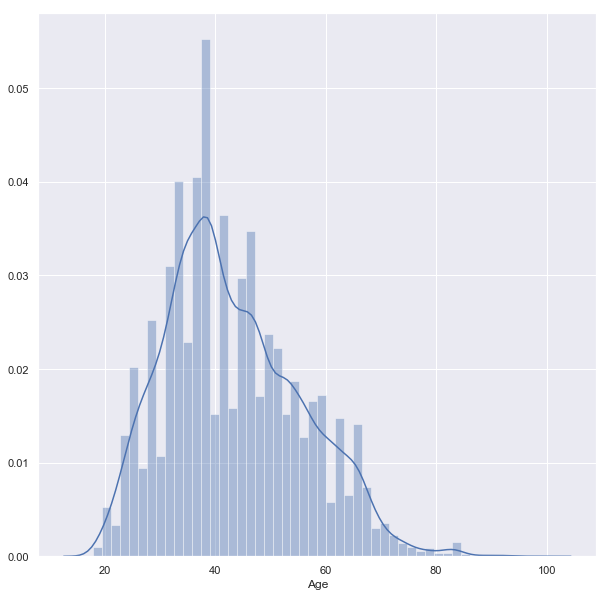

In [7]:
sns.distplot(df['Age'])
sns.set(rc={'figure.figsize':(10,10)})

The age range is from 18 to 99, but looking at some of the reviews above 80 don't seem to match the age associated with the review. So the distribution shown likely is not the correct shape. However, the majority of the reviews seem to come from ages 18 to 40, which is expected. 

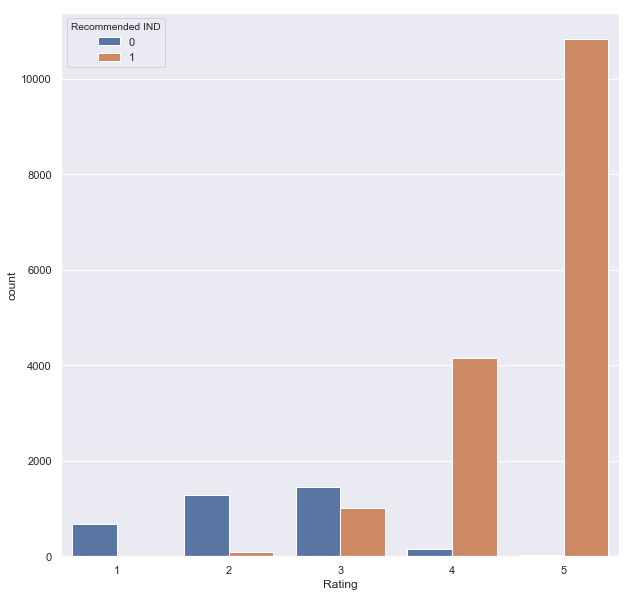

In [8]:
sns.countplot(x='Rating', hue='Recommended IND',data=df)
sns.set(rc={'figure.figsize':(10,20)})

In [9]:
df['Rating'].value_counts()

5    10858
4     4289
3     2464
2     1360
1      691
Name: Rating, dtype: int64

The majority of the reviews were positive with 77% at 4 or higher and 89% of reviews over 3. 3 would normally be the cutoff for an acceptable review while 2 or lower would be considered poor. However, it is interesting to see the high amount of non-recommended product recommendations at 3 with some even present at 4. 

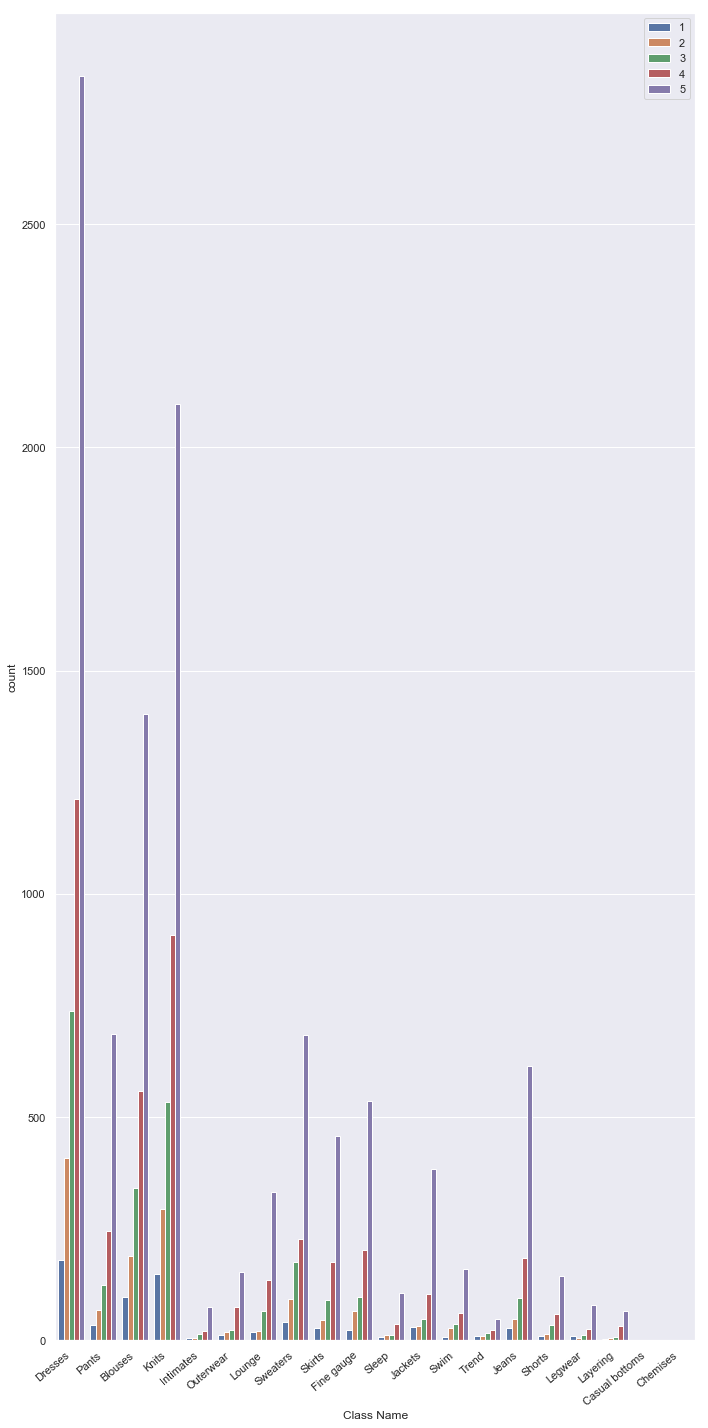

In [10]:
ax=sns.countplot(x="Class Name",hue='Rating',data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.legend(loc='upper right')
sns.set(rc={'figure.figsize':(10,10)})

The top 6 categories are dresses, knits, blouses, pants, jeans, and sweaters. The ratings by class follow the pattern shown above with the majority of ratings being 5. 

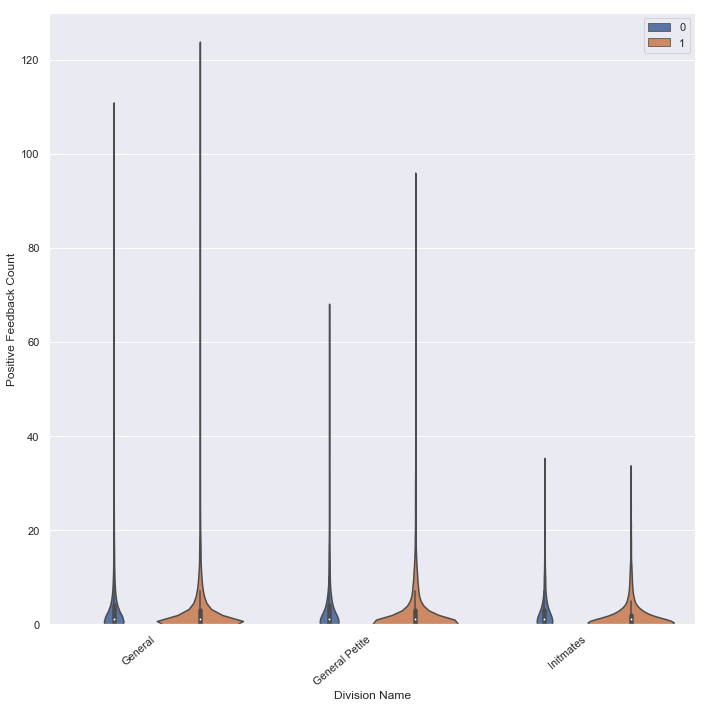

In [11]:
ax=sns.violinplot(x='Division Name',y='Positive Feedback Count',hue='Recommended IND',data=df,scale='count')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.legend(loc='upper right')
ax.set(ylim=(0, 130))
sns.set(rc={'figure.figsize':(10,10)})

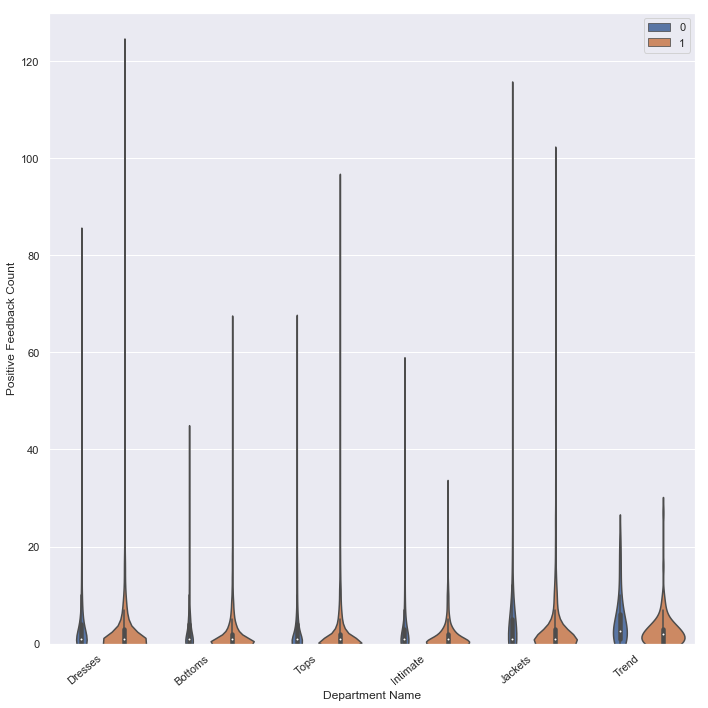

In [12]:
ax=sns.violinplot(x='Department Name',y='Positive Feedback Count',hue='Recommended IND',data=df,scale='count')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.legend(loc='upper right')
ax.set(ylim=(0, 130))
sns.set(rc={'figure.figsize':(10,10)})

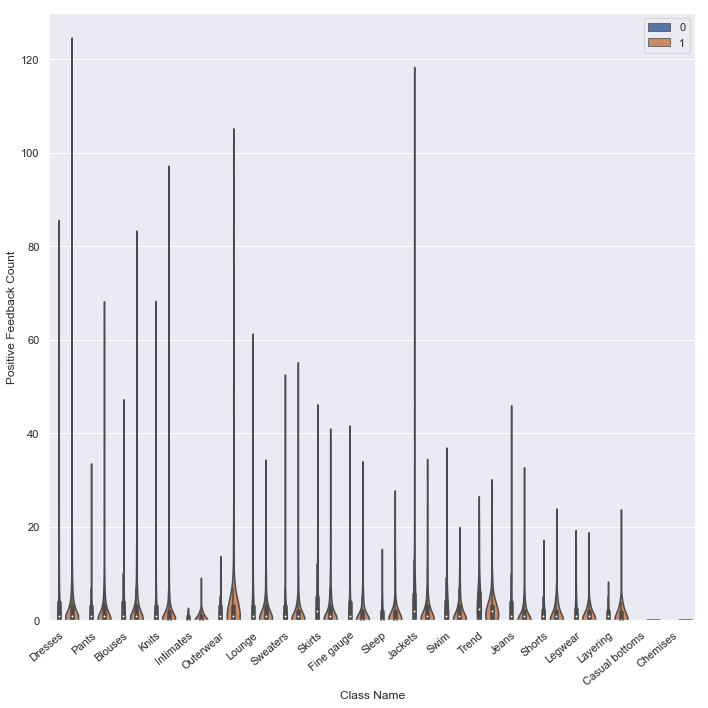

In [13]:
ax=sns.violinplot(x='Class Name',y='Positive Feedback Count',hue='Recommended IND',data=df,scale='count')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.legend(loc='upper right')
ax.set(ylim=(0, 130))
sns.set(rc={'figure.figsize':(10,10)})

In [14]:
print('Positive Feed Count by Recommendation')
print(df['Positive Feedback Count'].groupby(df['Recommended IND']).describe())

Positive Feed Count by Recommendation
                   count      mean       std  min  25%  50%  75%    max
Recommended IND                                                        
0                 3575.0  3.388252  6.613545  0.0  0.0  1.0  4.0  108.0
1                16087.0  2.488966  5.633717  0.0  0.0  1.0  3.0  122.0


Dresses, Jackets, and outerwear had the most positive feedback based on reviews. A very high majority(~80%) of the reviews were recommended, however this isn't suprising based on the ratio of 3 to 5 ratings to 1 to 2 ratings. In the case of women finding a review a positive and helpful, the range of values is not to far off. Visually, most of the categories show more counts in recommended reviews due to the dataset having such a positive reaction to the overall inventory. 

The dataset provides a good amount of information present in order to go along with the text analysis,but however there are some drawbacks in terms of likely false age entries and a potential for misentered information. 

# TEXT ANALYSIS

After reviewing the comments, they all are similiar in nature. Most of them mention colors, clothing sizes, and fit.here are misspelled words, however the overall style and nature of the reviews is consistent to move forward with needing to clean much. One noticeable thing was that reviews had a character limit with some being cutoff.

# Original Text 

In [15]:
df['tokenized_sents'] = df.apply(lambda row: nltk.word_tokenize(row['Review Text']), axis=1)
df['sents_length'] = df.apply(lambda row: len(row['tokenized_sents']), axis=1)

,count,mean,std,min,25%,50%,75%,max
Recommended IND,,,,,,,,
0,3575.0,73.220420,30.504122,4.0,48.0,74.0,103.0,139.0
1,16087.0,71.333437,32.571720,2.0,44.0,71.0,103.0,133.0


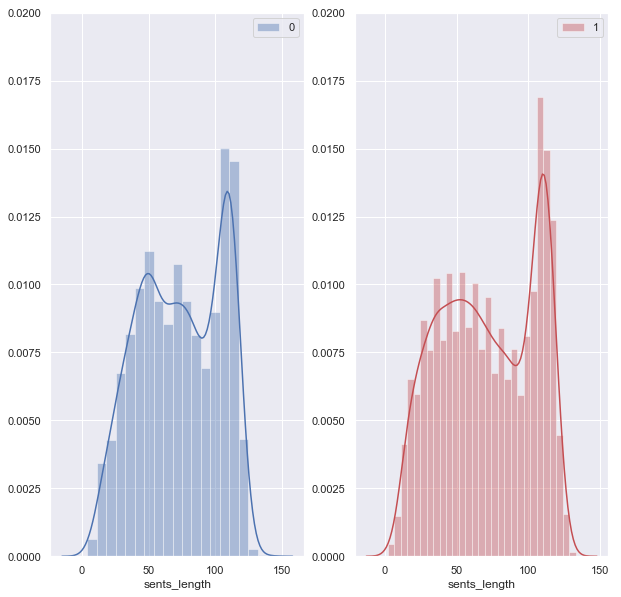

In [17]:
plt.subplot(1,2,1)
ax=sns.distplot(df[df['Recommended IND']==0]['sents_length'])
plt.legend(loc='upper right',labels=[0])
sns.set(rc={'figure.figsize':(10,10)})
ax.set_ylim(0,0.02)

plt.subplot(1,2,2)
ax=sns.distplot(df[df['Recommended IND']==1]['sents_length'],color='r')
plt.legend(loc='upper right',labels=[1])
sns.set(rc={'figure.figsize':(10,10)})
ax.set_ylim(0,0.02)

df['sents_length'].groupby(df['Recommended IND']).describe()

,count,mean,std,min,25%,50%,75%,max
Rating,,,,,,,,
1,691.0,69.694645,30.554835,4.0,46.0,69.0,99.00,124.0
2,1360.0,73.198529,30.652583,9.0,47.0,74.0,102.25,139.0
3,2464.0,76.056006,30.679120,5.0,51.0,77.0,106.00,133.0
4,4289.0,75.034973,32.360178,3.0,48.0,76.0,107.00,129.0
5,10858.0,69.291582,32.558596,2.0,41.0,67.0,101.00,131.0


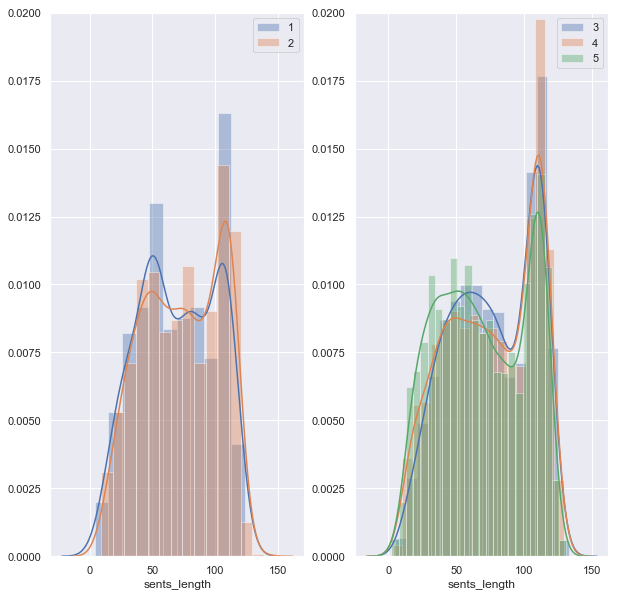

In [18]:
plt.subplot(1,2,1)
ax=sns.distplot(df[df['Rating']==1]['sents_length'])
ax=sns.distplot(df[df['Rating']==2]['sents_length'])
plt.legend(loc='upper right',labels=[1,2])
sns.set(rc={'figure.figsize':(10,10)})
ax.set_ylim(0,0.02)

plt.subplot(1,2,2)
ax=sns.distplot(df[df['Rating']==3]['sents_length'])
ax=sns.distplot(df[df['Rating']==4]['sents_length'])
ax=sns.distplot(df[df['Rating']==5]['sents_length'])
plt.legend(loc='upper right',labels=[3,4,5])
sns.set(rc={'figure.figsize':(10,10)})
ax.set_ylim(0,0.02)

df['sents_length'].groupby(df['Rating']).describe()

The reviews lengths for recommended and non recommended values have a simiilar distribution with a slight increase in density around the 100-150 range.  Rating is relatively similiar as well despite the recommended count being higher in 100-150 for 3-5 compared to 1-2. Class imbalance is present going forward. 

In [19]:
# Import stopwords with nltk.
from nltk.corpus import stopwords
stop = stopwords.words('english')
import string 
#apply lower case, stop words, and remove punctuation
df['Review Text']=df['Review Text'].str.lower()
df['Review Text']=df['Review Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df['Review Text']=df['Review Text'].str.replace('[{}]'.format(string.punctuation), '')

#Tokenize words by sentence
df['tokenized_sents'] = df.apply(lambda row: nltk.word_tokenize(row['Review Text']), axis=1)
#Sentence Length
df['sents_length'] = df.apply(lambda row: len(row['tokenized_sents']), axis=1)

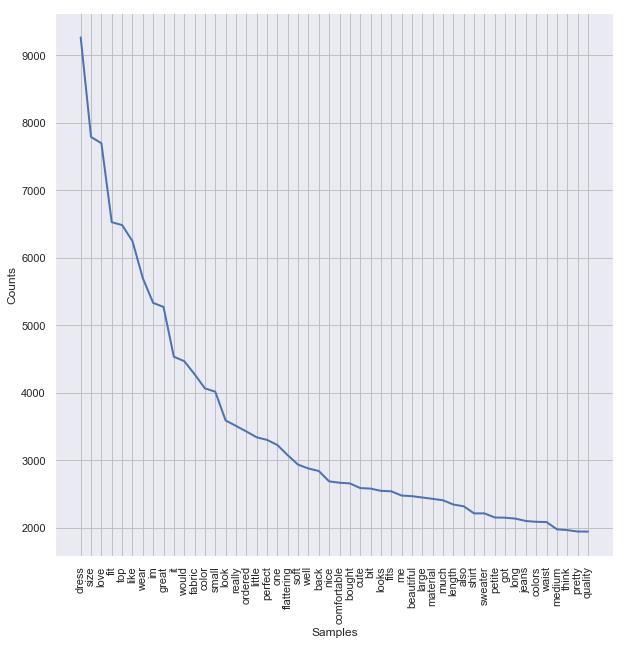

<Figure size 2880x72 with 0 Axes>

<Figure size 2880x72 with 0 Axes>

In [21]:
from nltk.probability import FreqDist
#Create list of token words
lists =  df['tokenized_sents']
words = []
for wordList in lists:
    words += wordList
#remove 50 most common words based on Brown corpus
fdist = FreqDist(words)
mostcommon = fdist.most_common(50)
mclist = []
for i in range(len(mostcommon)):
    mclist.append(mostcommon[i][0])
# mclist contains second-most common set of words
words = [w for w in words if w in mclist]
# this will keep ALL occurrences of the words in mclist

# Frequency Distribution Plot
import matplotlib.pyplot as plt
fdist.plot(50,cumulative=False)
plt.show()
plt.figure(figsize=(40,1))

The nltk text cleaning and frequency seemed to work okay, but there still seems to some words like "got", "even","work", and "also" present with high counts that don't really add much as potentially features in the top 100 words. The analysis gave 18346 different words, and 50 words only covers 0.27% with counts from 9266 to about 2000. 

# Feature Extraction-Bag of Words

In [23]:
df=pd.read_csv('Womens Clothing E-Commerce Reviews.csv')   
df.dropna(axis=0,inplace=True)
df.drop(['Unnamed: 0'],1,inplace=True)

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,3),max_features=250)
text_count= cv.fit_transform(df['Review Text'])
columns=cv.get_feature_names()

#combine countvectorizer features with original dataframe for supervised learning 
df_n=pd.DataFrame(text_count.toarray(), columns=columns)
df_feat= pd.concat([df, df_n], axis=1)
df_feat=df_feat.dropna()
df_feat=pd.get_dummies(df_feat,columns=['Department Name','Division Name'])
df_feat.shape

(16462, 267)

# Parameters

In [24]:
from sklearn.model_selection import train_test_split

#Target Recommended Review or not
Y = df_feat['Class Name']
X = df_feat.drop(['Class Name','Review Text','Title'],1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.25,random_state=0)

# Naive Bayes

In [25]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb = bnb.fit(X_train, Y_train)

print('Accuracy',bnb.score(X_train, Y_train))

#Cross Validation 
from sklearn.model_selection import cross_val_score
bnbscore = cross_val_score(bnb,X_train, Y_train, cv=5)
print('Cross Validation Scores',bnbscore)
print("%0.2f (+/- %0.2f)" % (bnbscore.mean(),bnbscore.std() * 2))

bnb_predicted = bnb.predict(X_train)
pd.crosstab(Y_train, bnb_predicted)

Accuracy 0.6493601166369675


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Cross Validation Scores [0.56133979 0.5689446  0.57067639 0.58661258 0.57375051]
0.57 (+/- 0.02)


col_0,Blouses,Dresses,Fine gauge,Intimates,Jackets,Jeans,Knits,Layering,Legwear,Lounge,Outerwear,Pants,Shorts,Skirts,Sleep,Sweaters,Swim,Trend
Class Name,,,,,,,,,,,,,,,,,,
Blouses,574,0,27,0,0,0,1024,0,0,0,0,0,0,0,0,44,0,0
Casual bottoms,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
Chemises,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
Dresses,0,3391,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Fine gauge,116,0,44,0,0,0,420,0,0,0,0,0,0,0,0,13,0,0
Intimates,0,0,0,38,0,0,0,1,8,16,0,0,0,0,6,0,13,0
Jackets,0,0,0,0,352,0,0,0,0,0,48,0,0,0,0,0,0,0
Jeans,0,0,0,0,0,293,0,0,0,0,0,186,29,94,0,0,0,0
Knits,445,0,34,0,0,0,1923,0,0,0,0,0,0,0,0,51,0,0


# Random Forest Model 

In [26]:
from sklearn import ensemble
rfc = ensemble.RandomForestClassifier(n_estimators=10)

rfc = rfc.fit(X_train, Y_train)

print('Accuracy:',rfc.score(X_train, Y_train))

#Cross Validation 
from sklearn.model_selection import cross_val_score
rfcscore = cross_val_score(rfc,X_train, Y_train, cv=5)
print('Cross Validation Scores',rfcscore)
print("%0.2f (+/- %0.2f)" % (rfcscore.mean(), rfcscore.std() * 2))

rfc_predicted = rfc.predict(X_train)
rfc_matrix=pd.crosstab(Y_train, rfc_predicted)
rfc_matrix

Accuracy: 0.9990280252713429


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Cross Validation Scores [0.87207425 0.89203397 0.89226407 0.90223124 0.90004063]
0.89 (+/- 0.02)


col_0,Blouses,Casual bottoms,Chemises,Dresses,Fine gauge,Intimates,Jackets,Jeans,Knits,Layering,Legwear,Lounge,Outerwear,Pants,Shorts,Skirts,Sleep,Sweaters,Swim,Trend
Class Name,,,,,,,,,,,,,,,,,,,,
Blouses,1669,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Casual bottoms,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Chemises,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Dresses,0,0,0,3391,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Fine gauge,0,0,0,0,592,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
Intimates,0,0,0,0,0,81,0,0,0,0,0,1,0,0,0,0,0,0,0,0
Jackets,0,0,0,0,0,0,400,0,0,0,0,0,0,0,0,0,0,0,0,0
Jeans,0,0,0,0,0,0,0,602,0,0,0,0,0,0,0,0,0,0,0,0
Knits,0,0,0,0,0,0,0,0,2453,0,0,0,0,0,0,0,0,0,0,0


# KNN Classification

In [27]:
from sklearn.neighbors import KNeighborsClassifier
n=list(range(2,6))
for i in n:
    print('n=',i)
    knn = KNeighborsClassifier(n_neighbors=i)
    knn = knn.fit(X_train, Y_train)

    print('Accuracy:',knn.score(X_train, Y_train))

    #Cross Validation 
    from sklearn.model_selection import cross_val_score
    knnscore = cross_val_score(knn,X_train, Y_train, cv=5)
    print('Cross Validation Scores',knnscore)
    print("%0.2f (+/- %0.2f)" % (knnscore.mean(), knnscore.std() * 2))

n= 2
Accuracy: 0.9718937307630001


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Cross Validation Scores [0.94713479 0.94055803 0.93924666 0.94279919 0.93661113]
0.94 (+/- 0.01)
n= 3
Accuracy: 0.972946703385712


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Cross Validation Scores [0.95641646 0.9421755  0.94694208 0.94563895 0.94311256]
0.95 (+/- 0.01)
n= 4
Accuracy: 0.9651709055564556


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Cross Validation Scores [0.94834544 0.94500607 0.94491697 0.94361055 0.93986184]
0.94 (+/- 0.01)
n= 5
Accuracy: 0.9649279118742913


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Cross Validation Scores [0.95076675 0.94621917 0.94491697 0.94685598 0.94555059]
0.95 (+/- 0.00)


In [28]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn = knn.fit(X_train, Y_train)

print('Accuracy:',knn.score(X_train, Y_train))

#Cross Validation 
from sklearn.model_selection import cross_val_score
knnscore = cross_val_score(knn,X_train, Y_train, cv=5)
print('Cross Validation Scores',knnscore)
print("%0.2f (+/- %0.2f)" % (knnscore.mean(), knnscore.std() * 2))

knn_predicted =knn.predict(X_train)
pd.crosstab(Y_train, knn_predicted)

Accuracy: 0.972946703385712


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Cross Validation Scores [0.95641646 0.9421755  0.94694208 0.94563895 0.94311256]
0.95 (+/- 0.01)


col_0,Blouses,Chemises,Dresses,Fine gauge,Intimates,Jackets,Jeans,Knits,Layering,Legwear,Lounge,Outerwear,Pants,Shorts,Skirts,Sleep,Sweaters,Swim,Trend
Class Name,,,,,,,,,,,,,,,,,,,
Blouses,1668,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
Casual bottoms,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Chemises,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Dresses,0,1,3388,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
Fine gauge,0,0,0,591,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
Intimates,0,0,0,0,52,0,0,0,1,4,15,0,0,4,0,3,0,3,0
Jackets,0,0,0,0,0,397,0,0,0,0,0,2,0,0,0,0,1,0,0
Jeans,0,0,3,0,0,0,594,1,0,0,0,0,0,0,3,0,0,1,0
Knits,2,0,1,0,1,0,0,2448,0,0,0,0,0,0,0,0,0,1,0


# Feature Extraction-TF-IDF

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_df=0.5, # drop words that occur in more than half the paragraphs
                             min_df=2, # only use words that appear at least twice
                             stop_words='english', 
                             lowercase=True, #convert everything to lower case (since Alice in Wonderland has the HABIT of CAPITALIZING WORDS for EMPHASIS)
                             use_idf=True,#we definitely want to use inverse document frequencies in our weighting
                             norm=u'l2', #Applies a correction factor so that longer paragraphs and shorter paragraphs get treated equally
                             smooth_idf=True #Adds 1 to all document frequencies, as if an extra document existed that used every word once.  Prevents divide-by-zero errors
                            )

text_count_tfidf=vectorizer.fit_transform(df['Review Text'])
columns=vectorizer.get_feature_names()

#combine countvectorizer features with original dataframe for supervised learning 
df_tf_idf=pd.DataFrame(text_count_tfidf.toarray(), columns=columns)
df_tf= pd.concat([df, df_tf_idf], axis=1)
df_tf=df_tf.dropna()
df_tf=pd.get_dummies(df_tf,columns=['Division Name','Department Name'])
df_tf.shape

(16462, 7623)

# Parameters

In [31]:
from sklearn.model_selection import train_test_split

#Target Recommended Review or not
Y_idf = df_tf['Class Name']
X_idf = df_tf.drop(['Class Name','Review Text','Title'],1)

X_train, X_test, Y_train, Y_test = train_test_split(X_idf, Y_idf,test_size=0.25,random_state=0)

# Naive Bayes

In [32]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb = bnb.fit(X_train, Y_train)

print('Accuracy',bnb.score(X_train, Y_train))

#Cross Validation 
from sklearn.model_selection import cross_val_score
bnbscore = cross_val_score(bnb,X_train, Y_train, cv=5)
print('Cross Validation Scores',bnbscore)
print("%0.2f (+/- %0.2f)" % (bnbscore.mean(),bnbscore.std() * 2))

bnb_predicted = bnb.predict(X_train)
pd.crosstab(Y_train, bnb_predicted)

Accuracy 0.7245261623197797


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Cross Validation Scores [0.53914447 0.53012535 0.54272985 0.54807302 0.54977651]
0.54 (+/- 0.01)


col_0,Blouses,Dresses,Fine gauge,Jackets,Jeans,Knits,Lounge,Pants,Skirts,Sweaters,Swim
Class Name,,,,,,,,,,,
Blouses,925,0,0,0,0,743,0,0,0,1,0
Casual bottoms,0,0,0,0,0,0,0,1,0,0,0
Chemises,0,0,0,0,0,0,1,0,0,0,0
Dresses,0,3391,0,0,0,0,0,0,0,0,0
Fine gauge,90,0,88,0,0,413,0,0,0,2,0
Intimates,0,0,0,0,0,0,82,0,0,0,0
Jackets,1,60,0,325,0,14,0,0,0,0,0
Jeans,0,0,0,0,415,0,0,186,1,0,0
Knits,73,0,1,0,0,2376,0,0,0,3,0


# KNN Regression

In [33]:
from sklearn.neighbors import KNeighborsClassifier
n=list(range(2,6))
for i in n:
    print('n=',i)
    knn = KNeighborsClassifier(n_neighbors=i)
    knn = knn.fit(X_train, Y_train)

    print('Accuracy:',knn.score(X_train, Y_train))

    #Cross Validation 
    from sklearn.model_selection import cross_val_score
    knnscore = cross_val_score(knn,X_train, Y_train, cv=5)
    print('Cross Validation Scores',knnscore)
    print("%0.2f (+/- %0.2f)" % (knnscore.mean(), knnscore.std() * 2))

n= 2
Accuracy: 0.977563583346833


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Cross Validation Scores [0.9511703  0.948241   0.94572701 0.95010142 0.94270622]
0.95 (+/- 0.01)
n= 3
Accuracy: 0.9741616717965332


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Cross Validation Scores [0.95601291 0.948241   0.94775213 0.95212982 0.94555059]
0.95 (+/- 0.01)
n= 4
Accuracy: 0.9676818402721529


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Cross Validation Scores [0.9527845  0.94904974 0.94856217 0.94523327 0.94514425]
0.95 (+/- 0.01)
n= 5
Accuracy: 0.9679248339543172


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Cross Validation Scores [0.9527845  0.9494541  0.95018226 0.95131846 0.94798862]
0.95 (+/- 0.00)


In [34]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
knn = knn.fit(X_train, Y_train)

print('Accuracy:',knn.score(X_train, Y_train))

#Cross Validation 
from sklearn.model_selection import cross_val_score
knnscore = cross_val_score(knn,X_train, Y_train, cv=5)
print('Cross Validation Scores',knnscore)
print("%0.2f (+/- %0.2f)" % (knnscore.mean(), knnscore.std() * 2))

knn_predicted =knn.predict(X_train)
knn_matrix=pd.crosstab(Y_train, knn_predicted)
knn_matrix

Accuracy: 0.977563583346833


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Cross Validation Scores [0.9511703  0.948241   0.94572701 0.95010142 0.94270622]
0.95 (+/- 0.01)


col_0,Blouses,Casual bottoms,Chemises,Dresses,Fine gauge,Intimates,Jackets,Jeans,Knits,Layering,Legwear,Lounge,Outerwear,Pants,Shorts,Skirts,Sleep,Sweaters,Swim,Trend
Class Name,,,,,,,,,,,,,,,,,,,,
Blouses,1669,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Casual bottoms,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Chemises,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Dresses,0,0,1,3390,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Fine gauge,0,0,0,0,593,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Intimates,0,0,0,1,0,81,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Jackets,0,0,0,0,0,0,400,0,0,0,0,0,0,0,0,0,0,0,0,0
Jeans,0,0,0,2,0,0,0,600,0,0,0,0,0,0,0,0,0,0,0,0
Knits,2,0,0,0,1,1,0,0,2449,0,0,0,0,0,0,0,0,0,0,0


# Random Forest Model

In [35]:
from sklearn import ensemble
rfc = ensemble.RandomForestClassifier(n_estimators=100)
rfc = rfc.fit(X_train, Y_train)

print('Accuracy:',rfc.score(X_train, Y_train))

#Cross Validation 
from sklearn.model_selection import cross_val_score
rfcscore = cross_val_score(rfc,X_train, Y_train, cv=5)

print('Cross Validation Scores',rfcscore)
print("%0.2f (+/- %0.2f)" % (rfcscore.mean(), rfcscore.std() * 2))

rfc_predicted = rfc.predict(X_train)
pd.crosstab(Y_train, rfc_predicted)

Accuracy: 1.0


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Cross Validation Scores [0.82163035 0.82167408 0.82948562 0.82393509 0.81674116]
0.82 (+/- 0.01)


col_0,Blouses,Casual bottoms,Chemises,Dresses,Fine gauge,Intimates,Jackets,Jeans,Knits,Layering,Legwear,Lounge,Outerwear,Pants,Shorts,Skirts,Sleep,Sweaters,Swim,Trend
Class Name,,,,,,,,,,,,,,,,,,,,
Blouses,1669,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Casual bottoms,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Chemises,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Dresses,0,0,0,3391,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Fine gauge,0,0,0,0,593,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Intimates,0,0,0,0,0,82,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Jackets,0,0,0,0,0,0,400,0,0,0,0,0,0,0,0,0,0,0,0,0
Jeans,0,0,0,0,0,0,0,602,0,0,0,0,0,0,0,0,0,0,0,0
Knits,0,0,0,0,0,0,0,0,2453,0,0,0,0,0,0,0,0,0,0,0


Naive Bayes performed the worst with the poorest accuracy and cross validation. KNN had the best combination between accuracy and cross validation while Random forest was the most accurate, but had lower cross validation scores. Using 250 of the most common words was sufficient while TF-IDF had over 7000 features. There was only improvement going to a tf-idf model feature selection with Naive Bias while KNN stayed the same and Random Forest got worse. I would choose KNN with countvectorizer in this case due to the combined combination of both metrics and a much quicker run time. 

# Model Test Set Evaluation

The KNN Bag of Words model will be used with the test set. 

In [36]:
df=pd.read_csv('Womens Clothing E-Commerce Reviews.csv')   
df.dropna(axis=0,inplace=True)
df.drop(['Unnamed: 0'],1,inplace=True)

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,3),max_features=250)
text_count= cv.fit_transform(df['Review Text'])
columns=cv.get_feature_names()

#combine countvectorizer features with original dataframe for supervised learning 
df_n=pd.DataFrame(text_count.toarray(), columns=columns)
df_feat= pd.concat([df, df_n], axis=1)
df_feat=df_feat.dropna()
df_feat=pd.get_dummies(df_feat,columns=['Department Name','Division Name'])
df_feat.shape

(16462, 267)

In [37]:
from sklearn.model_selection import train_test_split

#Target Recommended Review or not
Y = df_feat['Class Name']
X = df_feat.drop(['Class Name','Review Text','Title'],1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.25,random_state=0)

In [38]:
from sklearn.neighbors import KNeighborsClassifier
n=list(range(2,10))
for i in n:
    print('n=',i)
    knn = KNeighborsClassifier(n_neighbors=i)
    knn = knn.fit(X_test, Y_test)

    print('Accuracy:',knn.score(X_test, Y_test))

    #Cross Validation 
    from sklearn.model_selection import cross_val_score
    knnscore = cross_val_score(knn,X_test, Y_test, cv=5)
    print('Cross Validation Scores',knnscore)
    print("%0.2f (+/- %0.2f)" % (knnscore.mean(), knnscore.std() * 2))

n= 2
Accuracy: 0.968172983479106
Cross Validation Scores [0.92436975 0.91404358 0.90997567 0.91575092 0.9375    ]
0.92 (+/- 0.02)
n= 3
Accuracy: 0.9637998056365403
Cross Validation Scores [0.92917167 0.92493947 0.92335766 0.93040293 0.94730392]
0.93 (+/- 0.02)
n= 4
Accuracy: 0.9555393586005831
Cross Validation Scores [0.92917167 0.9188862  0.92214112 0.93528694 0.94117647]
0.93 (+/- 0.02)
n= 5
Accuracy: 0.956268221574344
Cross Validation Scores [0.92917167 0.92736077 0.92214112 0.94017094 0.94362745]
0.93 (+/- 0.02)
n= 6
Accuracy: 0.9492225461613216
Cross Validation Scores [0.92917167 0.92615012 0.9136253  0.93162393 0.94117647]
0.93 (+/- 0.02)
n= 7
Accuracy: 0.9499514091350826
Cross Validation Scores [0.93397359 0.92978208 0.91970803 0.93528694 0.93872549]
0.93 (+/- 0.01)
n= 8
Accuracy: 0.9458211856171039
Cross Validation Scores [0.92917167 0.91767554 0.91849148 0.92551893 0.93504902]
0.93 (+/- 0.01)
n= 9
Accuracy: 0.9475218658892128
Cross Validation Scores [0.92917167 0.92615012 0.91

In [39]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn = knn.fit(X_test, Y_test)

print('Accuracy:',knn.score(X_test, Y_test))

#Cross Validation 
from sklearn.model_selection import cross_val_score
knnscore = cross_val_score(knn,X_test, Y_test, cv=5)
print('Cross Validation Scores',knnscore)
print("%0.2f (+/- %0.2f)" % (knnscore.mean(), knnscore.std() * 2))

knn_predicted =knn.predict(X_test)
pd.crosstab(Y_test, knn_predicted)

Accuracy: 0.9637998056365403
Cross Validation Scores [0.92917167 0.92493947 0.92335766 0.93040293 0.94730392]
0.93 (+/- 0.02)


col_0,Blouses,Dresses,Fine gauge,Intimates,Jackets,Jeans,Knits,Layering,Legwear,Lounge,Outerwear,Pants,Shorts,Skirts,Sleep,Sweaters,Swim,Trend
Class Name,,,,,,,,,,,,,,,,,,
Blouses,565,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
Dresses,0,1121,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
Fine gauge,0,0,182,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Intimates,0,1,0,17,0,0,0,0,2,5,0,0,1,0,0,0,0,0
Jackets,0,0,0,0,131,0,0,0,0,0,0,0,0,0,0,1,0,0
Jeans,0,0,0,0,0,205,0,0,0,0,0,0,0,2,0,0,0,1
Knits,1,0,0,0,0,1,779,0,0,0,0,0,0,0,0,0,0,0
Layering,0,0,0,4,0,0,0,14,0,2,0,0,2,0,0,0,0,0
Legwear,0,0,0,1,0,0,0,0,22,0,0,0,0,0,1,0,0,0


The cross validation and accuracy decreased across all the combinations for n in KNN due to the smaller data set size. The model still performs consistently at a very high level. 

# Clustering 

For clustering, I will use K-means, Mean-Shift, and Agglomerative Clustering looking at Adjusted Rand Score, Homogenity, and Completenesss scores. Additionally, look at comparision to Class Name categories and see how accurate it is.

K-means Clustering works by assigning a number of clusters and matching each data point with the nearest centroid. The mean average is taken of all the points and the process is repeated until variance between the new and old clusters fall below a specified threshold value. It is a commonly run clustering technique. 

Mean-Shift Clustering is also an iterative process, but has no input on the number of clusters. It calculates the probability a data point falls within in n-dimesional space based on the features of the input file. The data points try to move up towards peaks in small steps. The peaks are determined by the bandwidth ranging from 0 to 1. A higher bandwidth means a smoother surface with defined peaks, while a lower bandwidth has more smaller peaks across a rougher surface. Once a data point reaches the top of the peak, it stops. After all the data points are settled, the clusters means are formed.

Agglomerative Clustering initially considers each data point a cluster merging similiar data points to form a set of cluster means. The user can predetermine the number of clusters to be formed. Once a set of clusters is formed,it cannot be undone always giving the same result every time unless the parameters are changed. 

In order to preserve the information in the dataset,K-means will not be preprocesed and have PCA performed given that the dataset is small to medium sized. There will be no limit on samples in Mean Shift to run all the possibiliites. For k-means and agglomerative clustering, the number of clusters will be equal to the unique values in Class Name feature.

# Adjusted Rand Score
The Rand Index compares how pairs of datapoints relate in the ground truth and in the post-clustering   assignment.There are four possible types of pair relationships:  
a=Members of the same cluster in the ground truth match same cluster in the new solution.  
b=Members of the same cluster in the ground truth match different clusters in the new solution. c=Members of   different clusters in the ground truth match the same cluster in the new solution. d=Members of different clusters in the ground truth match different clusters in the new solution.     
E(RI)- expected RI  
RI=(a+c)/sum(a,b,c,d)  
ARI=(RI-E(RI)/(max(RI)-E(RI))  

# Homogenity Score
Each cluster contains only members of a single class.

# Completeness Score
All members of a given class are assigned to the same cluster

# K-Means Clustering

In [40]:
df=pd.read_csv('Womens Clothing E-Commerce Reviews.csv')   
df.dropna(axis=0,inplace=True)
df.drop(['Unnamed: 0'],1,inplace=True)
df=pd.get_dummies(df,columns=['Division Name','Department Name'])
Y = df['Class Name']
X = df.drop(['Class Name','Review Text','Title'],1)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25,random_state=0)

from sklearn.cluster import KMeans

km=KMeans(n_clusters=len(df['Class Name'].unique()), random_state=42)

# Calculate predicted values.
y_pred =km.fit_predict(X_train)
y_pred=pd.Series(y_pred)

from sklearn import metrics
from sklearn.metrics import pairwise_distances   
print('Adjusted Rand Score:',metrics.adjusted_rand_score(y_pred,Y_train))
print('Homogenity Score:',metrics.homogeneity_score(y_pred,Y_train))
print('Completeness Score:',metrics.completeness_score(y_pred,Y_train))

kmean=pd.crosstab(y_pred,Y_train,rownames=['Clusters'])
accuracy=(sum(np.diagonal(kmean))/(kmean.sum().sum()))*100
print('K-means Accuracy for Class Name:',accuracy)
print('Comparing k-means clusters against the data:')
kmean

Adjusted Rand Score: 0.5121667293273958
Homogenity Score: 0.6619249400149201
Completeness Score: 0.7737812940452677
K-means Accuracy for Class Name: 4.992452016389907
Comparing k-means clusters against the data:


Class Name,Blouses,Casual bottoms,Dresses,Fine gauge,Intimates,Jackets,Jeans,Knits,Layering,Legwear,Lounge,Outerwear,Pants,Shorts,Skirts,Sleep,Sweaters,Swim,Trend
Clusters,,,,,,,,,,,,,,,,,,,
0,137,0,321,60,9,36,44,239,5,4,32,13,71,22,50,11,68,14,8
1,144,0,342,38,6,33,56,225,9,5,22,6,65,6,37,11,78,13,4
2,24,0,43,4,1,3,6,26,1,0,5,1,4,0,3,3,8,3,0
3,95,0,170,41,4,24,27,129,4,8,13,8,33,4,27,7,39,7,8
4,10,0,34,9,0,5,5,22,0,1,6,0,2,2,0,1,7,1,0
5,159,0,360,42,5,42,69,263,4,5,40,16,70,16,50,9,77,11,6
6,9,0,18,0,0,0,1,11,1,1,0,2,5,1,1,1,3,0,3
7,78,0,148,23,2,14,25,104,3,3,19,5,24,9,11,5,26,5,5
8,16,0,17,2,1,3,1,17,1,1,3,0,5,0,4,1,5,3,0


# Mean Shift Clustering 

In [41]:
from sklearn.cluster import MeanShift, estimate_bandwidth
df=pd.read_csv('Womens Clothing E-Commerce Reviews.csv')   
df.dropna(axis=0,inplace=True)
df.drop(['Unnamed: 0'],1,inplace=True)
df=pd.get_dummies(df,columns=['Division Name','Department Name'])
Y = df['Class Name']
X = df.drop(['Class Name','Review Text','Title'],1)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25,random_state=0)


# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_train, quantile=0.2)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)

y_pred =ms.fit_predict(X_train)

y_pred=pd.Series(y_pred)

from sklearn import metrics   
print('Adjusted Rand Score:',metrics.adjusted_rand_score(y_pred,Y_train))
print('Homogenity Score:',metrics.homogeneity_score(y_pred,Y_train))
print('Completeness Score:',metrics.completeness_score(y_pred,Y_train))

mshift=pd.crosstab(y_pred,Y_train,rownames=['Clusters'])
accuracy=(sum(np.diagonal(mshift))/(mshift.sum().sum()))*100
print('Mean Shift Accuracy for Class Name:',accuracy)
print('Comparing Mean Shift clusters against the data:')
mshift

Adjusted Rand Score: 0.37780390657480134
Homogenity Score: 0.8424116641029098
Completeness Score: 0.3846871324611394
Mean Shift Accuracy for Class Name: 6.663791244339013
Comparing Mean Shift clusters against the data:


Class Name,Blouses,Casual bottoms,Dresses,Fine gauge,Intimates,Jackets,Jeans,Knits,Layering,Legwear,Lounge,Outerwear,Pants,Shorts,Skirts,Sleep,Sweaters,Swim,Trend
Clusters,,,,,,,,,,,,,,,,,,,
0,553,1,1188,213,23,145,208,893,20,19,127,48,250,64,162,40,255,43,35
1,569,0,1180,186,27,143,204,886,22,26,113,52,230,38,162,37,276,57,22
2,26,0,47,4,1,3,7,31,1,0,6,1,5,0,4,3,10,3,1
3,30,0,63,9,1,6,7,36,2,3,9,1,10,3,8,2,10,5,0
4,24,0,60,2,2,5,8,34,1,1,4,3,18,1,9,2,7,2,3
5,21,0,63,11,0,7,6,57,0,0,8,2,9,2,9,1,16,0,1


# Agglomerative Clustering

In [44]:
from sklearn.cluster import AgglomerativeClustering
df=pd.read_csv('Womens Clothing E-Commerce Reviews.csv')   
df.dropna(axis=0,inplace=True)
df.drop(['Unnamed: 0'],1,inplace=True)
df=pd.get_dummies(df,columns=['Division Name','Department Name'])
Y = df['Class Name']
X = df.drop(['Class Name','Review Text','Title'],1)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25,random_state=0)

ac=AgglomerativeClustering(n_clusters=len(df['Class Name'].unique()))
# Calculate predicted values.
y_pred =ac.fit_predict(X_train)
y_pred=pd.Series(y_pred)

from sklearn import metrics   
print('Adjusted Rand Score:',metrics.adjusted_rand_score(y_pred,Y_train))
print('Homogenity Score:',metrics.homogeneity_score(y_pred,Y_train))
print('Completeness Score:',metrics.completeness_score(y_pred,Y_train))

acm=pd.crosstab(y_pred,Y_train,rownames=['Clusters'])
accuracy=(sum(np.diagonal(acm))/(acm.sum().sum()))*100
print('Agglomerative Clustering Accuracy for Class Name:',accuracy)
print('Comparing Agglomerative clusters against the data:')
acm

Adjusted Rand Score: 0.6279357448068155
Homogenity Score: 0.726307592946369
Completeness Score: 0.8129697118945428
Agglomerative Clustering Accuracy for Class Name: 5.876644382143628
Comparing Agglomerative clusters against the data:


Class Name,Blouses,Casual bottoms,Dresses,Fine gauge,Intimates,Jackets,Jeans,Knits,Layering,Legwear,Lounge,Outerwear,Pants,Shorts,Skirts,Sleep,Sweaters,Swim,Trend
Clusters,,,,,,,,,,,,,,,,,,,
0,199,1,454,74,7,52,67,337,9,4,42,21,113,30,67,16,97,18,9
1,145,0,341,37,6,33,56,226,9,5,22,6,65,7,36,11,78,13,4
2,86,0,164,43,4,24,27,129,3,9,11,7,31,4,25,7,39,7,7
3,153,0,309,61,7,40,51,227,4,9,35,12,52,15,46,13,73,10,8
4,92,0,165,27,2,15,28,115,4,3,21,6,29,9,14,5,29,5,6
5,142,0,317,39,5,39,59,239,4,4,37,13,64,16,46,9,67,10,6
6,11,0,43,4,0,1,7,21,1,1,5,1,6,1,5,1,5,1,1
7,14,0,31,1,1,4,6,21,0,0,4,2,14,1,7,1,3,2,1
8,11,0,36,9,0,6,5,26,0,1,6,0,2,2,0,1,7,1,0


Mean-Shift performed the worst looking at all the metrics,also having 6 clusters rather than 20 in the ground truth.  K-means was more consistent accross all the metrics, but it still doesn't seem to be performing well. Agglomerative Clustering performed the best with the most consistent scores overall. All the crosstabs were lower than 7% in accuracy. Clustering did not impress overall with no consistent groupings. It seems to be all over the place. However, K-mean or Agglomerative should be compared over more reviews with respect to consistenty of ARI,homogenity, and completeness to pick the best method to conclude a data narrative.  

# Clustering by Testing Set

In [45]:
from sklearn.cluster import AgglomerativeClustering
df=pd.read_csv('Womens Clothing E-Commerce Reviews.csv')   
df.dropna(axis=0,inplace=True)
df.drop(['Unnamed: 0'],1,inplace=True)
df=pd.get_dummies(df,columns=['Division Name','Department Name'])
Y = df['Class Name']
X = df.drop(['Class Name','Review Text','Title'],1)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25,random_state=0)

ac=AgglomerativeClustering(n_clusters=len(df['Class Name'].unique()))
# Calculate predicted values.
y_pred =ac.fit_predict(X_test)
y_pred=pd.Series(y_pred)

from sklearn import metrics   
print('Adjusted Rand Score:',metrics.adjusted_rand_score(y_pred,Y_test))
print('Homogenity Score:',metrics.homogeneity_score(y_pred,Y_test))
print('Completeness Score:',metrics.completeness_score(y_pred,Y_test))

acm=pd.crosstab(y_pred,Y_test,rownames=['Clusters'])
accuracy=(sum(np.diagonal(acm))/(acm.sum().sum()))*100
print('Agglomerative Clustering Accuracy for Class Name:',accuracy)
print('Comparing Agglomerative clusters against the data:')
acm

Adjusted Rand Score: 0.6282479955778851
Homogenity Score: 0.7313934746798516
Completeness Score: 0.8399674748515787
Agglomerative Clustering Accuracy for Class Name: 6.25
Comparing Agglomerative clusters against the data:


Class Name,Blouses,Dresses,Fine gauge,Intimates,Jackets,Jeans,Knits,Layering,Legwear,Lounge,Outerwear,Pants,Shorts,Skirts,Sleep,Sweaters,Swim,Trend
Clusters,,,,,,,,,,,,,,,,,,
0,2,3,1,1,2,1,4,0,0,0,0,0,1,1,0,0,0,0
1,19,34,6,3,6,8,20,1,2,2,1,12,1,0,2,7,2,0
2,1,3,1,0,0,1,4,0,0,2,1,0,0,0,0,0,0,0
3,31,36,10,2,2,7,27,0,0,0,1,9,0,8,1,9,3,0
4,0,1,2,0,0,0,4,0,0,0,0,2,0,0,0,1,0,0
5,2,5,1,0,1,0,4,0,0,1,0,0,1,3,0,3,1,0
6,7,9,0,0,1,3,9,0,0,3,0,5,3,3,0,2,1,0
7,12,18,2,0,2,2,14,0,1,1,0,1,0,3,1,3,1,1
8,7,26,3,2,3,3,12,1,1,0,0,4,0,1,1,0,1,0


There is still room for improvement, but the consistent homogenity and completeness scores are a good sign. 

# Unsupervised Feature Generation

In [46]:
df=pd.read_csv('Womens Clothing E-Commerce Reviews.csv')   
df.dropna(axis=0,inplace=True)
df.drop(['Unnamed: 0'],1,inplace=True)

# Import stopwords with nltk.
from nltk.corpus import stopwords
stop = stopwords.words('english')
import string 
#apply lower case, stop words, and remove punctuation
df['Review Text']=df['Review Text'].str.lower()
df['Review Text']=df['Review Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df['Review Text']=df['Review Text'].str.replace('[{}]'.format(string.punctuation), '')

#Tokenize words by sentence
df['tokenized_sents'] = df.apply(lambda row: nltk.word_tokenize(row['Review Text']), axis=1)
#Sentence Length
df['sents_length'] = df.apply(lambda row: len(row['tokenized_sents']), axis=1)

In [47]:
import gensim
from gensim.models import word2vec

model = word2vec.Word2Vec(
    df['tokenized_sents'] ,
    workers=10,     # Number of threads to run in parallel (if your computer does parallel processing).
    min_count=3,   # Minimum word count threshold.
    window=10,     # Number of words around target word to consider.
    sg=0,          # Use CBOW(sg=0) because our corpus is small.
    sample=1e-3 ,  # Penalize frequent words.
    size=300,      # Word vector length.
    hs=1           # Use hierarchical softmax hs=1 for training 
)

vectors = model.wv
df_gs=pd.DataFrame(np.array(vectors[words]))

vocab = model.wv.vocab.keys()
# view similar words based on gensim's model
similar_words = {search_term: [item[0] for item in vectors.most_similar([search_term], topn=5)]
                 for search_term in ['dresses', 'pants', 'blouse', 'knit', 'lingerie',
                                     'lounge', 'sweaters','belts','skirt','panties','bra',
                                     'swim', 'lace', 'jeans', 'shorts', 'yoga','leggings']}
similar_words

{'dresses': ['maeve', 'clothing', 'exception', 'gill', 'styles'],
 'pants': ['pant', 'shorts', 'these', 'trousers', 'jeans'],
 'blouse': ['top', 'lace', 'embroidery', 'crochet', 'print'],
 'knit': ['jersey', 'cotton', 'yarn', 'texture', 'silky'],
 'lingerie': ['spray', 'remover', 'washings', 'unwearable', 'dance'],
 'lounge': ['yoga', 'sleep', 'ready', 'kids', 'lounging'],
 'sweaters': ['jackets', 'vests', 'boiled', 'sweater', 'cardigans'],
 'belts': ['sounds', 'oth', 'level', 'verdugo', 'teach'],
 'skirt': ['dress', 'aline', 'pencil', 'natural', 'skirts'],
 'panties': ['thong', 'non', 'children', 'inserts', 'grace'],
 'bra': ['straps', 'cami', 'cleavage', 'camisole', 'strapless'],
 'swim': ['bathing', 'coverup', 'comfiest', 'bandeau', 'bralette'],
 'lace': ['crochet', 'embroidered', 'embroidery', 'trim', 'eyelet'],
 'jeans': ['pant', 'jean', 'pants', 'skinnys', 'trousers'],
 'shorts': ['pants', 'trousers', 'pant', 'skirts', 'legging'],
 'yoga': ['sleep', 'gym', 'lounge', 'workout', 't

After iterating creating a vocab list of about 6566 words with the gensim model, it peformed with mixed results. I originally chose the class name headers, but they all didn't appear in the vocab list. From there, I incorporated words that were relevant to the data. I kept the min count at 3 to try to capture a majority of the data. Knit, shorts, and sweaters have the best associations while lingerie , panties, and belts did the worst. The latter is likely due to the lower count of inventory totals. 

In [48]:
#combine gensim features with original dataframe for supervised learning 
df_featgs= pd.concat([df, df_gs], axis=1)
df_featgs=df_featgs.dropna()
df_featgs=pd.get_dummies(df_featgs,columns=['Department Name','Division Name',])
df_featgs.shape
df_featgs.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Class Name,tokenized_sents,sents_length,...,299,Department Name_Bottoms,Department Name_Dresses,Department Name_Intimate,Department Name_Jackets,Department Name_Tops,Department Name_Trend,Division Name_General,Division Name_General Petite,Division Name_Initmates
2,1077.0,60.0,Some major design flaws,high hopes dress really wanted work me initial...,3.0,0.0,0.0,Dresses,"[high, hopes, dress, really, wanted, work, me,...",51.0,...,0.534929,0,1,0,0,0,0,1,0,0
3,1049.0,50.0,My favorite buy!,love love love jumpsuit fun flirty fabulous ev...,5.0,1.0,0.0,Pants,"[love, love, love, jumpsuit, fun, flirty, fabu...",15.0,...,0.723299,1,0,0,0,0,0,0,1,0
4,847.0,47.0,Flattering shirt,shirt flattering due adjustable front tie perf...,5.0,1.0,6.0,Blouses,"[shirt, flattering, due, adjustable, front, ti...",16.0,...,0.945291,0,0,0,0,1,0,1,0,0
5,1080.0,49.0,Not for the very petite,love tracy reese dresses one petite 5 feet tal...,2.0,0.0,4.0,Dresses,"[love, tracy, reese, dresses, one, petite, 5, ...",42.0,...,-0.110224,0,1,0,0,0,0,1,0,0
6,858.0,39.0,Cagrcoal shimmer fun,aded basket hte last mintue see would look lik...,5.0,1.0,1.0,Knits,"[aded, basket, hte, last, mintue, see, would, ...",51.0,...,-0.567747,0,0,0,0,1,0,0,1,0


In [49]:
from sklearn.model_selection import train_test_split

#Target Recommended Review or not
Y = df_featgs['Class Name']
X = df_featgs.drop(['Class Name','Review Text','Title','tokenized_sents'],1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.25,random_state=0)
split=['Training','Testing']

In [50]:
from sklearn.neighbors import KNeighborsClassifier
n=list(range(2,7))
for k in split:
    print (k)
    if k=='Training':
            for i in n:
                print('n=',i)
                knn = KNeighborsClassifier(n_neighbors=i)
                knn = knn.fit(X_train, Y_train)

                print('Accuracy:',knn.score(X_train, Y_train))

                #Cross Validation 
                from sklearn.model_selection import cross_val_score
                knnscore = cross_val_score(knn,X_train, Y_train, cv=5)
                print('Cross Validation Scores',knnscore)
                print("%0.2f (+/- %0.2f)" % (knnscore.mean(), knnscore.std() * 2))
                print('')
    else: 
            for i in n:
                print('n=',i)
                knn = KNeighborsClassifier(n_neighbors=i)
                knn = knn.fit(X_test, Y_test)

                print('Accuracy:',knn.score(X_test, Y_test))

                #Cross Validation 
                from sklearn.model_selection import cross_val_score
                knnscore = cross_val_score(knn,X_test, Y_test, cv=5)
                print('Cross Validation Scores',knnscore)
                print("%0.2f (+/- %0.2f)" % (knnscore.mean(), knnscore.std() * 2))
                print('')

Training
n= 2
Accuracy: 0.9505628645056287


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Cross Validation Scores [0.89445196 0.90176152 0.90474576 0.90495587 0.90618627]
0.90 (+/- 0.01)

n= 3
Accuracy: 0.9551742845517428


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Cross Validation Scores [0.91305819 0.91327913 0.91728814 0.92057026 0.91740313]
0.92 (+/- 0.01)

n= 4
Accuracy: 0.9460870744608707


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Cross Validation Scores [0.90866035 0.91395664 0.91559322 0.91581806 0.9228416 ]
0.92 (+/- 0.01)

n= 5
Accuracy: 0.9476468194764682


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Cross Validation Scores [0.91305819 0.91869919 0.91966102 0.92260692 0.9225017 ]
0.92 (+/- 0.01)

n= 6
Accuracy: 0.9410009494100094


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Cross Validation Scores [0.91271989 0.9200542  0.92237288 0.91989138 0.92352141]
0.92 (+/- 0.01)

Testing
n= 2
Accuracy: 0.9497558991049634


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Cross Validation Scores [0.89728097 0.88145897 0.89602446 0.8886619  0.89446721]
0.89 (+/- 0.01)

n= 3
Accuracy: 0.9564686737184703


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Cross Validation Scores [0.90735146 0.89969605 0.91335372 0.91215526 0.8954918 ]
0.91 (+/- 0.01)

n= 4
Accuracy: 0.9408055329536208


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Cross Validation Scores [0.91238671 0.89665653 0.91131498 0.90909091 0.89241803]
0.90 (+/- 0.02)

n= 5
Accuracy: 0.9389747762408462


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Cross Validation Scores [0.91742195 0.89969605 0.91641182 0.91011236 0.89959016]
0.91 (+/- 0.02)

n= 6
Accuracy: 0.9320585842148088


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Cross Validation Scores [0.91440081 0.90172239 0.91539246 0.91215526 0.89754098]
0.91 (+/- 0.01)



In [51]:
knn = KNeighborsClassifier(n_neighbors=3)
knn = knn.fit(X_train, Y_train)
print('Training')
print('Accuracy:',knn.score(X_train, Y_train))

#Cross Validation 
from sklearn.model_selection import cross_val_score
knnscore = cross_val_score(knn,X_train, Y_train, cv=5)
print('Cross Validation Scores',knnscore)
print("%0.2f (+/- %0.2f)" % (knnscore.mean(), knnscore.std() * 2))

knn_predicted =knn.predict(X_train)
pd.crosstab(Y_train, knn_predicted)

Training
Accuracy: 0.9551742845517428


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Cross Validation Scores [0.91305819 0.91327913 0.91728814 0.92057026 0.91740313]
0.92 (+/- 0.01)


col_0,Blouses,Casual bottoms,Dresses,Fine gauge,Intimates,Jackets,Jeans,Knits,Layering,Legwear,Lounge,Outerwear,Pants,Shorts,Skirts,Sleep,Sweaters,Swim,Trend
Class Name,,,,,,,,,,,,,,,,,,,
Blouses,1905,0,0,0,0,0,0,29,0,0,0,0,0,0,0,0,0,0,0
Casual bottoms,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Dresses,0,0,4048,0,0,0,1,0,0,0,0,2,4,0,0,0,0,1,4
Fine gauge,1,0,0,699,0,0,0,1,0,0,0,0,0,0,0,0,4,0,0
Intimates,2,0,3,0,52,0,0,0,1,2,11,0,0,2,0,4,0,6,0
Jackets,0,0,1,0,0,446,0,0,0,0,0,1,0,0,3,0,5,0,0
Jeans,0,0,3,0,0,0,663,0,0,0,0,0,0,0,14,0,0,0,1
Knits,8,0,1,5,2,0,0,2989,0,0,0,0,0,0,0,0,0,0,0
Layering,0,0,1,0,9,0,1,0,63,3,5,0,0,0,0,1,0,5,1


In [52]:
knn = KNeighborsClassifier(n_neighbors=3)
knn = knn.fit(X_test, Y_test)
print('Testing')
print('Accuracy:',knn.score(X_test, Y_test))

#Cross Validation 
from sklearn.model_selection import cross_val_score
knnscore = cross_val_score(knn,X_test, Y_test, cv=5)
print('Cross Validation Scores',knnscore)
print("%0.2f (+/- %0.2f)" % (knnscore.mean(), knnscore.std() * 2))

knn_predicted =knn.predict(X_test)
pd.crosstab(Y_test, knn_predicted)

Testing
Accuracy: 0.9564686737184703


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Cross Validation Scores [0.90735146 0.89969605 0.91335372 0.91215526 0.8954918 ]
0.91 (+/- 0.01)


col_0,Blouses,Chemises,Dresses,Fine gauge,Intimates,Jackets,Jeans,Knits,Layering,Legwear,Lounge,Outerwear,Pants,Shorts,Skirts,Sleep,Sweaters,Swim,Trend
Class Name,,,,,,,,,,,,,,,,,,,
Blouses,642,0,1,0,0,0,0,10,0,0,0,0,0,0,0,0,0,0,0
Chemises,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Dresses,0,0,1310,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
Fine gauge,0,0,0,221,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
Intimates,1,0,1,0,30,0,0,0,0,1,3,0,0,0,0,0,0,1,0
Jackets,0,0,0,0,0,140,0,0,0,0,0,0,0,0,2,0,0,0,0
Jeans,0,2,2,0,0,0,283,1,0,0,0,0,0,0,1,0,0,0,0
Knits,0,0,1,1,0,0,0,974,0,0,0,0,0,0,0,0,0,0,0
Layering,0,1,3,0,1,0,0,0,17,1,0,0,0,0,0,3,0,0,0


The gensim model unsupervised features performs consistent with the countvectorizer results at high accuracy. The standard deviation is looks to be lowest out of the all the models. I am thoroughly impressed, but also think that Gensim provides more options for analysis in similarity and other topics.

# Final Thoughts

Overall, BoW, TF-IDF, and Gensim provided very consistent and accurate models for this data when indentifying the class name on the reviews as compared to the clustering. TF-IDF had the longest run time with the worst results of the methods. However, the drawback is that GenSim is the only method allowing for further analysis to determine any new target class names to add. It would be interesting to see if another dataset of reviews peformed just as well over a longer time period.
The clustering results weren't great, but give the insight to look into to see if some of the class names are similiar see which catergories are associated to target sales marketing patterns for the inventory. It could be used to combine to simplify the inventory and promote sales of similiarly inventory. For example if jeans and shorts were associated, offer a discount on the sales of both items together. A combination of Gensim and clustering methods allows the company to back up industry intuition in similiar situations.